Thanks - your data will be uploaded.
Here is how your results compare to those of other participants.


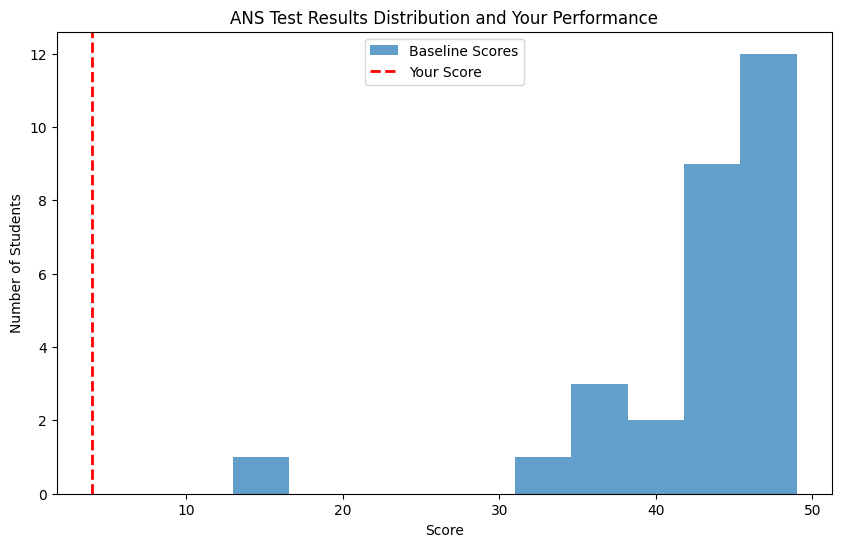

In [9]:
# Imports the necessary libraries
# you may need to run pip install ipywidgets and pip install jupyter_ui_poll if running on your own computer

from IPython.display import display, Image, clear_output, HTML
from jupyter_ui_poll import ui_events
import time
import random
import ipywidgets as widgets
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import matplotlib.pyplot as plt

# Function to upload data to Google Forms

form_url=''
def send_to_google_form(data_dict, form_url):
    ''' Helper function to upload information to a corresponding google form 
        You are not expected to follow the code within this function!
    '''
    form_id = form_url[34:90]
    view_form_url = f'https://docs.google.com/forms/d/e/{form_id}/viewform'
    post_form_url = f'https://docs.google.com/forms/d/e/{form_id}/formResponse'

    page = requests.get(view_form_url)
    content = BeautifulSoup(page.content, "html.parser").find('script', type='text/javascript')
    content = content.text[27:-1]
    result = json.loads(content)[1][1]
    form_dict = {}
    
    loaded_all = True
    for item in result:
        if item[1] not in data_dict:
            print(f"Form item {item[1]} not found. Data not uploaded.")
            loaded_all = False
            return False
        form_dict[f'entry.{item[4][0][0]}'] = data_dict[item[1]]
    
    post_result = requests.post(post_form_url, data=form_dict)
    return post_result.ok


# Function to allow button functionality

event_info = {
    'type': '',
    'description': '',
    'time': -1
}

def wait_for_event(timeout=-1, interval=0.001, max_rate=20, allow_interupt=True):    
    start_wait = time.time()

    # set event info to be empty
    # as this is dict we can change entries
    # directly without using
    # the global keyword
    event_info['type'] = ""
    event_info['description'] = ""
    event_info['time'] = -1

    n_proc = int(max_rate*interval)+1
    
    with ui_events() as ui_poll:
        keep_looping = True
        while keep_looping==True:
            # process UI events
            ui_poll(n_proc)

            # end loop if we have waited more than the timeout period
            if (timeout != -1) and (time.time() > start_wait + timeout):
                keep_looping = False
                
            # end loop if event has occured
            if allow_interupt==True and event_info['description']!="":
                keep_looping = False
                
            # add pause before looping
            # to check events again
            time.sleep(interval)
    
    # return event description after wait ends
    # will be set to empty string '' if no event occured
    return event_info

# this function lets buttons 
# register events when clicked
def register_event(btn):
    # display button description in output area
    event_info['type'] = "click"
    event_info['description'] = btn.description
    event_info['time'] = time.time()
    return


# Loads in images for the ANS test

Image1=Image("ANS_4_3.png",width=400)
Image2=Image("ANS_7_6.png",width=400)
Image3=Image("ANS_9_8.png",width=400)
Image4=Image("ANS_10_9.png",width=400)
Image5=Image("ANS_18_21.png",width=400)
Image6=Image("ANS_15_20.png",width=400)
Image7=Image("ANS_16_12.png",width=400)
Image8=Image("ANS_18_20.png",width=400)
Image9=Image("ANS_9_8.png",width=400)
Image10=Image("ANS_16_12.png",width=400)
Image11=Image("ANS_18_20.png",width=400)
Image12=Image("ANS_15_20.png",width=400)
Image13=Image("ANS_4_3.png",width=400)
Image14=Image("ANS_7_6.png",width=400)
Image15=Image("ANS_10_9.png",width=400)
Image16=Image("ANS_18_21.png",width=400)
Image17=Image("ANS_15_20.png",width=400)
Image18=Image("ANS_4_3.png",width=400)
Image19=Image("ANS_7_6.png",width=400)
Image20=Image("ANS_18_20.png",width=400)
Image21=Image("ANS_10_9.png",width=400)
Image22=Image("ANS_7_6.png",width=400)
Image23=Image("ANS_15_20.png",width=400)
Image24=Image("ANS_18_21.png",width=400)
Image25=Image("ANS_16_12.png",width=400)
Image26=Image("ANS_9_8.png",width=400)
Image27=Image("ANS_4_3.png",width=400)
Image28=Image("ANS_10_9.png",width=400)
Image29=Image("ANS_18_20.png",width=400)
Image30=Image("ANS_16_12.png",width=400)
Image31=Image("ANS_7_6.png",width=400)
Image32=Image("ANS_9_8.png",width=400)
Image33=Image("ANS_15_20.png",width=400)
Image34=Image("ANS_18_21.png",width=400)
Image35=Image("ANS_4_3.png",width=400)
Image36=Image("ANS_7_6.png",width=400)
Image37=Image("ANS_18_20.png",width=400)
Image38=Image("ANS_10_9.png",width=400)
Image39=Image("ANS_7_6.png",width=400)
Image40=Image("ANS_15_20.png",width=400)
Image41=Image("ANS_16_12.png",width=400)
Image42=Image("ANS_9_8.png",width=400)
Image43=Image("ANS_4_3.png",width=400)
Image44=Image("ANS_18_21.png",width=400)
Image45=Image("ANS_10_9.png",width=400)
Image46=Image("ANS_18_20.png",width=400)
Image47=Image("ANS_7_6.png",width=400)
Image48=Image("ANS_9_8.png",width=400)
Image49=Image("ANS_16_12.png",width=400)
Image50=Image("ANS_15_20.png",width=400)



image_list=[Image1,Image2,Image3,Image4,Image5,Image6,Image7,Image8,Image9,Image10,
            Image11,Image12,Image13,Image14,Image15,Image16,Image17,Image18,Image19,Image20,
            Image21,Image22,Image23,Image24,Image25,Image26,Image27,Image28,Image29,Image30,
            Image31,Image32,Image33,Image34,Image35,Image36,Image37,Image38,Image39,Image40,
            Image41,Image42,Image43,Image44,Image45,Image46,Image47,Image48,Image49,Image50,
           ]

# Dictionary made up of the images and their paired answers

answers={
    Image1:"Left",Image2:"Right",Image3:"Right",Image4:"Right",Image5:"Right",Image6:"Left",Image7:"Left",Image8:"Left",Image9:"Right",Image10:"Left",
    Image11:"Left",Image12:"Left",Image13:"Left",Image14:"Right",Image15:"Right",Image16:"Right",Image17:"Left",Image18:"Left",Image19:"Right",Image20:"Right",
    Image21:"Right",Image22:"Right",Image23:"Left",Image24:"Right",Image25:"Left",Image26:"Right",Image27:"Left",Image28:"Right",Image29:"Left",Image30:"Left",
    Image31:"Right",Image32:"Right",Image33:"Left",Image34:"Right",Image35:"Left",Image36:"Right",Image37:"Left",Image38:"Right",Image39:"Right",Image40:"Left",
    Image41:"Left",Image42:"Right",Image43:"Left",Image44:"Right",Image45:"Right",Image46:"Left",Image47:"Right",Image48:"Right",Image49:"Left",Image50:"Left",

}
       
score = 0

print("Welcome to the ANS test")
time.sleep(3)
clear_output(wait=True)

id_instructions = """
Enter your anonymised ID

To generate an anonymous 4-letter unique user identifier please enter:
- two letters based on the initials (first and last name) of a childhood friend
- two letters based on the initials (first and last name) of a favourite actor / actress
e.g. if your friend was called Charlie Brown and film star was Tom Cruise
then your unique identifer would be CBTC
"""

# Displays insructions for creating an anonymous user ID
print(id_instructions)

# Obtains a user ID and confirms it to the user
user_id = input("> ")

print("User entered id:", user_id)
time.sleep(2)
clear_output(wait=True)

# Obtains the user's gender and confirms it to the user
print("Please enter your gender in capital: M or F")
gender = input("> ")
print("Gender:",gender)
time.sleep(2)
clear_output(wait=True)

# Displays instructions for the ANS test
print("You will be shown an image with two sets of coloured dots for a split second.") 
print("Choose which side has more dots by answering either 'right' or 'left'.")
print("You have only 3 seconds to answer.")
print("You will have a 1.5 seconds pause after responding before next image is shown.")
time.sleep(15)
clear_output(wait=True)

# Dictionary storing the question number, user-submitted answer, and correct answer 
results = {
    'question': [],   
    'user_ans': [],
    'correct_ans': [],  
}

# Initialises the question number to 0 
i = 0

# Loops test based on number of images 
for image in image_list:

    # Displays image for 0.75 seconds before hiding it
    display(image)
    time.sleep(0.75)
    clear_output(wait=False)

    start_time=time.time()
    
    correct_answer = answers[image]

    # Button for user input
    btn1 = widgets.Button(description="Left")
    btn2 = widgets.Button(description="Right")

    btn1.on_click(register_event) 
    btn2.on_click(register_event)
    
    panel = widgets.HBox([btn1, btn2])
    display(panel)

    # Provides user with only 3 seconds to respond before button is hidden
    result = wait_for_event(timeout=3)
    clear_output(wait=True)

    # Moves on to the next question and also adds 1 to the user score if correct answer was input
    if result['description']== correct_answer:
        print(f"{result['description']} is the correct answer.")
        score+=1
        time.sleep(0.8)
        clear_output(wait=True)
    
    elif result['description']== "":
        print("Sorry you took too long.")
        time.sleep(0.8)
        clear_output(wait=True)

    else:
        print("Sorry that's the wrong answer")
        time.sleep(0.8)
        clear_output(wait=True)

    # Adds 1 to the question number and appends that, along with the user-submitted answer, and correct
    # answer to the dictionary
    i +=1
    results['question'].append(i)
    results['user_ans'].append(result['description'])
    results['correct_ans'].append(correct_answer)

    # Calculates time taken answering the question
    end_time = time.time()-0.8
    time_taken = end_time-start_time

    # Displays the time taken answering the question
    print(f"You took {time_taken:.2f} seconds for this question.")
    time.sleep(0.7)
    clear_output(wait=True)

# Displays the user's final score
if score==len(image_list):
    print(f"Wow, you got all {len(image_list)} questions correct. Congrats!")
elif score >= 40:
    print(f"Congrats, you scored {score} out of {len(image_list)}!")
elif 15 <= score < 40:
    print(f"You scored {score} out of {len(image_list)}.")
else:
    print(f"Oh no, you scored {score} out of {len(image_list)}.")

# Creates a DataFrame storing the user's responses for each question
resultsdf = pd.DataFrame(results)

# Dictionary for Google Forms data submission
data_dict={
    'User ID': user_id,
    'Gender': gender,
    'Score': score,
    'JSON': resultsdf.to_json()
    }

# Google Forms URL
form_url='https://docs.google.com/forms/d/e/1FAIpQLScnVDnHMW5p1UtacmOrDgNkDYX---peCtMAjbwE82HWVR86Og/viewform?usp=sf_link'

# User data consent disclaimer
print("Please read:")
print("")
print("We wish to record your response data")
print("to an anonymised public data repository. ")
print("Your data will be used for educational teaching purposes")
print("practising data analysis and visualisation.")
print("")
print("Please press the yes button below if you consent to the upload.")

# Displays consent buttons to the user
btn3 = widgets.Button(description="Yes")
btn4 = widgets.Button(description="No")

btn3.on_click(register_event) 
btn4.on_click(register_event)
    
panel = widgets.HBox([btn3, btn4])
display(panel)

result = wait_for_event(timeout=500000)
clear_output()

# Function uploads data if the user has given consent
if result['description']== "No":
    print("No problem we hope you enjoyed the test.")
elif result['description']== "Yes":
    print("Thanks - your data will be uploaded.")
    send_to_google_form(data_dict, form_url)
    
    # If consent was given, displays a comparison between the user's results and results obtained from the other paricipants
    print("Here is how your results compare to those of other participants.")
    ansx_df = pd.read_csv("ANS Responses A.csv")
    all_scores=ansx_df['Score']
    plt.figure(figsize=(10,6))
    plt.hist(all_scores, bins=10, alpha=0.7, label='Baseline Scores')
    plt.axvline(score, color='r', linestyle='dashed' ,linewidth=2, label='Your Score')
    plt.xlabel('Score')
    plt.ylabel('Number of Students')
    plt.title('ANS Test Results Distribution and Your Performance')
    plt.legend()
    plt.show()